# TF2 10mins

Tensorflow2 학습은 Tensorflow2 공식 홈페이지의 내용이 좋기때문에 해당 내용 기반으로 수행해 가면서 익혀봅니다.

https://www.tensorflow.org/overview?hl=ko

**초보자를 위한 빠른 시작**에서는 Keras의 Sequential Model을 기반으로 간단하게 모델을 설계하는 것을 보여 줍니다.
* [Sequential Model](https://keras.io/getting-started/sequential-model-guide/)
  * 스택처럼 쌓아서 만드는 단일 구조의 딥러닝 모델을 간편하게 설계할 수 있습니다.

**전문가를 위한 빠른 시작**에서는 Keras의 Function API 및 tf.function 을 이용하는 방식을 보여줍니다.
* [Function API](https://keras.io/getting-started/functional-api-guide/)
  * 다양한 모델을 엮어 만드는 복잡한 구조의 딥러닝 모델을 설계할 수 있습니다.
  * multi-output models, directed acyclic graphs, 또는 shared layers를 가지는 모델들의 설계가 가능합니다.
  
Tensorflow2 로 넘어 오면서 
* API 정리: 기존에 복잡했던 API 들에 대한 정리가 이루어지고, Keras 가 High Level Core API 로 포함되었습니다.
* Eager execution: Pytorch 처럼 즉시 실행이 기본 동작이 되었습니다. 
* @tf.function: 데코레이터를 이용하면 편리하게 데이터의 비동기 프리페치(Prefetch)/스트리밍(Streaming) 기능 및 오토그래프(Autograph)를 적용 시켜 성능 향상됩니다.

Tensorflow2 에 대한 상세 소개는 아래 동영상을 참고하세요

[![youtube](https://img.youtube.com/vi/FvAsdZwavpA/0.jpg)](https://www.youtube.com/watch?v=FvAsdZwavpA)


In [1]:
# 경고 메시지 출력 끄기
import warnings 
warnings.filterwarnings(action='ignore')

%matplotlib inline
import matplotlib.pyplot as plt
import IPython

import sys

rseed = 22
import random
random.seed(rseed)

import numpy as np
np.random.seed(rseed)
np.set_printoptions(precision=3)
np.set_printoptions(formatter={'float_kind': "{:.3f}".format})

import pandas as pd
pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.5f}'.format

import tensorflow as tf
tf.random.set_seed(rseed)
tf.keras.backend.set_floatx('float32') # keras default float type 설정

print(f"python ver={sys.version}")
print(f"pandas ver={pd.__version__}")
print(f"numpy ver={np.__version__}")
print(f"tensorflow ver={tf.__version__}")

python ver=3.7.6 (default, Nov 21 2020, 22:51:13) 
[Clang 12.0.0 (clang-1200.0.32.27)]
pandas ver=1.0.5
numpy ver=1.19.5
tensorflow ver=2.4.1


## 초보자를 위한 빠른 시작

n=60000, w=28, h=28
type: xs_train=uint8
type: ys_train=uint8
sample: xs_train[0]=


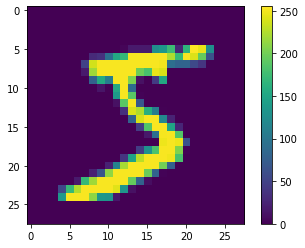

sample: ys_train[0]=5
type: x_train=float64


In [2]:
# MNIST 샘플 데이터
mnist = tf.keras.datasets.mnist

(xs_train, ys_train), (xs_test, ys_test) = mnist.load_data()

# 학습할 이미지는 28x28 사이즈의 0~255 사이 값을 가지는 패션 이미지 입니다.
n, w, h = xs_train.shape
print(f"n={n}, w={w}, h={h}")
print(f"type: xs_train={xs_train.dtype}")
print(f"type: ys_train={ys_train.dtype}")

idx = 0
print(f"sample: xs_train[{idx}]=")
plt.figure()
plt.imshow(xs_train[idx])
plt.colorbar()
plt.grid(False)
plt.show()
print(f"sample: ys_train[{idx}]={ys_train[idx]}")

# Data를 0 ~ 1 사이 float 값으로 Scaling 을 변환 합니다.
xs_train, xs_test = xs_train / 255.0, xs_test / 255.0
print(f"type: x_train={xs_train.dtype}")

In [3]:
# Sequential 방식으로 모델 설계
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # 28x28 형태로 데이터를 입력 받아 1차원 형태로 변환
  tf.keras.layers.Dense(128, activation='relu'), # 활성화 함수로 relu 사용
  tf.keras.layers.Dropout(0.2), # 과적합 방지를 위해 dropout 적용
  tf.keras.layers.Dense(10, activation='softmax') # 출력에서 logit 값을 softmax 를 통해 각 클래스의 확률 값으로 변환 
])

# 모델 출력 / 컴파일
model.summary()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', # sparse_categorical_crossentropy 손실 함수를 사용하면 학습/평가시 y 값을 one hot 인코딩 해주지 않아도 되어 편리
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(xs_train, ys_train, epochs=5)
model.evaluate(xs_test,  ys_test, verbose=2)

Epoch 1/5
1875/1875 [==============================] - 2s 714us/step - loss: 0.4874 - accuracy: 0.8576
Epoch 2/5
1875/1875 [==============================] - 1s 696us/step - loss: 0.1566 - accuracy: 0.9533
Epoch 3/5
1875/1875 [==============================] - 1s 700us/step - loss: 0.1137 - accuracy: 0.9647
Epoch 4/5
1875/1875 [==============================] - 1s 697us/step - loss: 0.0889 - accuracy: 0.9737
Epoch 5/5
1875/1875 [==============================] - 1s 695us/step - loss: 0.0733 - accuracy: 0.9771
313/313 - 0s - loss: 0.0753 - accuracy: 0.9779


[0.07531022280454636, 0.9779000282287598]

In [5]:
# 예측을 위해 데이터의 shape을 맞춰 줍니다.
x_test = (np.expand_dims(xs_test[0], 0))
y_test = ys_test[0]
print(x_test.shape)

y_prob = model.predict(x_test) # 모델의 출력이 softmax 이기때문에 각 클래스의 확률값이 반환됨
y_pred = np.argmax(y_prob) # 확률 값 중 가장 큰 값의 인덱스 값을 레이블 값으로 선택
print(f"y_prob={y_prob}")
print(f"y_pred={y_pred}, y_test={y_test}")

(1, 28, 28)
y_prob=[[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000]]
y_pred=7, y_test=7


## 전문가를 위한 빠른 시작

In [6]:
# Dataset 을 통해 미니 배치 학습을 위한 데이터 셋을 쉽게 만들 수 있습니다. 
train_ds = tf.data.Dataset.from_tensor_slices((xs_train, ys_train)).shuffle(10000).batch(32) # 버퍼사이즈(10000)만큼씩 데이터를 랜덤하게 가져와서 배치사이즈(32)만큼씩 제공합니다.  
test_ds = tf.data.Dataset.from_tensor_slices((xs_test, ys_test)).batch(32)

In [7]:
class DNN(tf.keras.Model):
    # 모델에 필요한 각 레이어를 선언합니다.
    def __init__(self):
        super(DNN, self).__init__()
        self.flatten = tf.keras.layers.Flatten(input_shape=(28, 28), dtype='float64') # 28x28 형태로 데이터를 입력 받아 1차원 형태로 변환
        self.dense = tf.keras.layers.Dense(128, activation='relu')
        self.dropout = tf.keras.layers.Dropout(0.2)
        self.softmax = tf.keras.layers.Dense(10, activation='softmax')

    # 각 레이어를 연결합니다.
    def call(self, x):
        x = self.flatten(x)
        x = self.dense(x)
        x = self.dropout(x)
        return self.softmax(x)

model = DNN()

In [8]:
# Loss 함수와 Optimizer를 선언합니다.
loss_object = tf.keras.losses.SparseCategoricalCrossentropy() # SparseCategoricalCrossentropy()를 사용하면 학습/평가시 y 값을 one hot 인코딩 해주지 않아도 되어 편리
optimizer = tf.keras.optimizers.Adam()

In [9]:
# 학습 결과를 저장할 변수를 선언합니다.
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

In [10]:
# GradientTape()을 통해 Loss 를 학습시킵니다. 
@tf.function # tf.function 을 통해 성능을 향상합니다.
def train_step(images, labels):
    with tf.GradientTape() as tape:
        predictions = model(images)
        loss = loss_object(labels, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    train_loss(loss)
    train_accuracy(labels, predictions)

In [11]:
@tf.function
def test_step(images, labels):
    predictions = model(images)
    t_loss = loss_object(labels, predictions)

    test_loss(t_loss)
    test_accuracy(labels, predictions)

In [12]:
EPOCHS = 5

for epoch in range(EPOCHS):
    for images, labels in train_ds:
        train_step(images, labels)

    for test_images, test_labels in test_ds:
        test_step(test_images, test_labels)

    template = '에포크: {}, 손실: {}, 정확도: {}, 테스트 손실: {}, 테스트 정확도: {}'
    print (template.format(epoch+1,
                           train_loss.result(), train_accuracy.result()*100,
                           test_loss.result(), test_accuracy.result()*100))

에포크: 1, 손실: 0.251775324344635, 정확도: 92.80166625976562, 테스트 손실: 0.1288292109966278, 테스트 정확도: 96.24000549316406
에포크: 2, 손실: 0.18197131156921387, 정확도: 94.73416900634766, 테스트 손실: 0.11977911740541458, 테스트 정확도: 96.37000274658203
에포크: 3, 손실: 0.14691072702407837, 정확도: 95.71221923828125, 테스트 손실: 0.10805168747901917, 테스트 정확도: 96.73332977294922
에포크: 4, 손실: 0.12449602037668228, 정확도: 96.34833526611328, 테스트 손실: 0.10113336890935898, 테스트 정확도: 96.9425048828125
에포크: 5, 손실: 0.10851043462753296, 정확도: 96.79766845703125, 테스트 손실: 0.09583290666341782, 테스트 정확도: 97.09400177001953


In [13]:
# 예측을 위해 데이터의 shape을 맞춰 줍니다.
x_test = (np.expand_dims(xs_test[0], 0))
y_test = ys_test[0]
print(x_test.shape)

y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob)
print(f"y_prob={y_prob}")
print(f"y_pred={y_pred}, y_test={y_test}")

(1, 28, 28)
y_prob=[[0.000 0.000 0.000 0.000 0.000 0.000 0.000 1.000 0.000 0.000]]
y_pred=7, y_test=7


In [14]:
# MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.